# 10yr note analysis

For the Quantitative Assignment, you must use Python 3 for the implementation, and you must use the FRED API to query and retrieve data. Write a brief 2 page (PDF) summary of your model, modeling choices, and conclusions. A few suggested points to keep in mind while building the model and writing the summary:

*	Did you have to apply any transformations to the variables?
*	How did you test the stability of your results?


## Step 1

Query and retrieve the following data series from online macroeconomic database FRED using their API (https://fred.stlouisfed.org/):

No.	Data series	    FRED Ticker
1.	US 1Y Treasury	GS1
2.	US 2Y Treasury	GS2
3.	US 3Y Treasury	GS3
4.	US 5Y Treasury	GS5
5.	US 7Y Treasury	GS7
6.	US 10Y Treasury	GS10


### Importing Libraries

In [1]:
#the fredapi library is installed below
#!pip install fredapi
# the following libraries are imported for this project


import pandas as pd
import numpy as np
import fredapi as fa
import pandas_datareader as pdr
import datetime as dt

In [2]:
#importing the 1Y series as a data frame

#Setting api Key
fred=fa.Fred(api_key='dffda2ca869f4ae8b1f2c8f8b92bd5b0')
#importing 1Y series and display first 10 rows
GS1 = fred.get_series('GS1')
GS1.head(10)

1953-04-01    2.36
1953-05-01    2.48
1953-06-01    2.45
1953-07-01    2.38
1953-08-01    2.28
1953-09-01    2.20
1953-10-01    1.79
1953-11-01    1.67
1953-12-01    1.66
1954-01-01    1.41
dtype: float64

In [3]:
#importing 2Y series and display first 10 rows
GS2 = fred.get_series('GS2')
GS2.head(10)

1976-06-01    7.06
1976-07-01    6.85
1976-08-01    6.63
1976-09-01    6.42
1976-10-01    5.98
1976-11-01    5.81
1976-12-01    5.38
1977-01-01    5.90
1977-02-01    6.09
1977-03-01    6.09
dtype: float64

In [4]:
#importing 3Y series and display first 10 rows
GS3 = fred.get_series('GS3')
GS3.head(10)

1953-04-01    2.51
1953-05-01    2.72
1953-06-01    2.74
1953-07-01    2.62
1953-08-01    2.58
1953-09-01    2.56
1953-10-01    2.23
1953-11-01    2.20
1953-12-01    2.07
1954-01-01    1.89
dtype: float64

In [5]:
#importing 5Y series and display first 10 rows
GS5 = fred.get_series('GS5')
GS5.head(10)

1953-04-01    2.62
1953-05-01    2.87
1953-06-01    2.94
1953-07-01    2.75
1953-08-01    2.80
1953-09-01    2.71
1953-10-01    2.43
1953-11-01    2.42
1953-12-01    2.32
1954-01-01    2.17
dtype: float64

In [6]:
#importing 7Y series and display first 10 rows
GS7 = fred.get_series('GS7')
GS7.head(10)

1969-07-01    6.80
1969-08-01    6.79
1969-09-01    7.36
1969-10-01    7.24
1969-11-01    7.17
1969-12-01    7.51
1970-01-01    7.73
1970-02-01    7.51
1970-03-01    7.13
1970-04-01    7.45
dtype: float64

In [7]:
#importing 10Y series and display first 10 rows
GS10 = fred.get_series('GS10')
GS10.head(10)

1953-04-01    2.83
1953-05-01    3.05
1953-06-01    3.11
1953-07-01    2.93
1953-08-01    2.95
1953-09-01    2.87
1953-10-01    2.66
1953-11-01    2.68
1953-12-01    2.59
1954-01-01    2.48
dtype: float64

## Step 2

Step 2: Consider the dataset of monthly changes of the 6 series above. Can you reduce the dimensions of this new dataset, while still explaining “most” of the variation in it? How would you interpret these “reduced” dimensions? Are they stable over time?

In [8]:
#using datetime and pdr to pull in the 10Y as a dataframe 
start = dt.datetime(1953, 4, 1)
end = dt.datetime(2023, 1, 1)

df_10y = pdr.DataReader('GS10', 'fred', start, end)
display(df_10y)

,GS10
DATE,
1953-04-01,2.83
1953-05-01,3.05
1953-06-01,3.11
1953-07-01,2.93
1953-08-01,2.95
...,...
2022-07-01,2.90
2022-08-01,2.90
2022-09-01,3.52


In [9]:
#Quarterly 10y if including GDP
df_10y_q = df_10y[df_10y.reset_index().index%3==0]
display(df_10y_q)

,GS10
DATE,
1953-04-01,2.83
1953-07-01,2.93
1953-10-01,2.66
1954-01-01,2.48
1954-04-01,2.29
...,...
2021-10-01,1.58
2022-01-01,1.76
2022-04-01,2.75


In [10]:
#using datetime and pdr to pull in the GDP as a dataframe 
start = dt.datetime(1953, 4, 1)
end = dt.datetime(2023, 1, 1)

df_gdp = pdr.DataReader('GDP', 'fred', start, end)
display(df_gdp)

#note this is a quarterly result and likely should perhaps be the change in GDP QoQ

,GDP
DATE,
1953-04-01,391.749
1953-07-01,391.171
1953-10-01,385.970
1954-01-01,385.345
1954-04-01,386.121
...,...
2021-07-01,23550.420
2021-10-01,24349.121
2022-01-01,24740.480


In [11]:
#the percent change is the interesting item to address this
df_gdp["gdp_delta"] = df_gdp["GDP"].pct_change()*100
df_gdp.head(10)

,GDP,gdp_delta
DATE,,
1953-04-01,391.749,NaN
1953-07-01,391.171,-0.147543
1953-10-01,385.970,-1.329598
1954-01-01,385.345,-0.161930
1954-04-01,386.121,0.201378
1954-07-01,390.996,1.262558
1954-10-01,399.734,2.234805
1955-01-01,413.073,3.336969
1955-04-01,421.532,2.047822


In [12]:
#using datetime and pdr to pull in the UNRATE as a dataframe 
start = dt.datetime(1953, 4, 1)
end = dt.datetime(2023, 1, 1)

df_unrate = pdr.DataReader('UNRATE', 'fred', start, end, 3)
display(df_unrate)

,UNRATE
DATE,
1953-04-01,2.7
1953-05-01,2.5
1953-06-01,2.5
1953-07-01,2.6
1953-08-01,2.7
...,...
2022-07-01,3.5
2022-08-01,3.7
2022-09-01,3.5


In [13]:
#Quarterly unrate if including GDP
df_unrate_q = df_unrate[df_unrate.reset_index().index%3==0]
display(df_unrate_q)

,UNRATE
DATE,
1953-04-01,2.7
1953-07-01,2.6
1953-10-01,3.1
1954-01-01,4.9
1954-04-01,5.9
...,...
2021-10-01,4.6
2022-01-01,4.0
2022-04-01,3.6


In [14]:
#using datetime and pdr to pull in the Average Hourly Earnings as a dataframe CES0500000003
start = dt.datetime(1953, 4, 1)
end = dt.datetime(2023, 1, 1)

df_avg_earn = pdr.DataReader('CES0500000003', 'fred', start, end)
display(df_avg_earn)

,CES0500000003
DATE,
2006-03-01,20.04
2006-04-01,20.16
2006-05-01,20.13
2006-06-01,20.22
2006-07-01,20.30
...,...
2022-07-01,32.27
2022-08-01,32.36
2022-09-01,32.49


In [15]:
#the percent change is the interesting item to address this
df_avg_earn["earn_delta"] = df_avg_earn["CES0500000003"].pct_change()*100
df_avg_earn.head(10)

,CES0500000003,earn_delta
DATE,,
2006-03-01,20.04,NaN
2006-04-01,20.16,0.598802
2006-05-01,20.13,-0.148810
2006-06-01,20.22,0.447094
2006-07-01,20.30,0.395648
2006-08-01,20.32,0.098522
2006-09-01,20.41,0.442913
2006-10-01,20.44,0.146987
2006-11-01,20.48,0.195695


In [16]:
df_avg_earn1 = df_avg_earn[1:]
display(df_avg_earn1)

,CES0500000003,earn_delta
DATE,,
2006-04-01,20.16,0.598802
2006-05-01,20.13,-0.148810
2006-06-01,20.22,0.447094
2006-07-01,20.30,0.395648
2006-08-01,20.32,0.098522
...,...,...
2022-07-01,32.27,0.498287
2022-08-01,32.36,0.278897
2022-09-01,32.49,0.401731


In [17]:
#Quarterly avg. earnings if including GDP
df_avg_earn_q = df_avg_earn1[df_avg_earn1.reset_index().index%3==0]
display(df_avg_earn_q)

,CES0500000003,earn_delta
DATE,,
2006-04-01,20.16,0.598802
2006-07-01,20.30,0.395648
2006-10-01,20.44,0.146987
2007-01-01,20.60,0.145843
2007-04-01,20.79,0.337838
...,...,...
2021-10-01,31.11,0.614489
2022-01-01,31.56,0.573614
2022-04-01,31.86,0.346457


In [18]:
#using datetime and pdr to pull in the Median inflation rate as a dataframe MEDCPIM158SFRBCLE
start = dt.datetime(1953, 4, 1)
end = dt.datetime(2023, 1, 1)

df_inflation = pdr.DataReader('MEDCPIM158SFRBCLE', 'fred', start, end)
display(df_inflation)

,MEDCPIM158SFRBCLE
DATE,
1983-01-01,5.014653
1983-02-01,4.952545
1983-03-01,3.612261
1983-04-01,4.828054
1983-05-01,3.767326
...,...
2022-07-01,6.483074
2022-08-01,9.222973
2022-09-01,8.307776


In [19]:
df_inflation_q = df_inflation[df_inflation.reset_index().index%3==0]
display(df_inflation_q)

,MEDCPIM158SFRBCLE
DATE,
1983-01-01,5.014653
1983-04-01,4.828054
1983-07-01,3.697582
1983-10-01,4.709707
1984-01-01,4.852490
...,...
2021-10-01,6.251637
2022-01-01,7.141525
2022-04-01,6.527993


In [20]:
#using datetime and pdr to pull in CPI Urban CPIAUCSL
start = dt.datetime(1953, 4, 1)
end = dt.datetime(2023, 1, 1)

df_cpi = pdr.DataReader('CPIAUCSL', 'fred', start, end)
display(df_cpi)

,CPIAUCSL
DATE,
1953-04-01,26.690
1953-05-01,26.700
1953-06-01,26.770
1953-07-01,26.790
1953-08-01,26.850
...,...
2022-07-01,295.271
2022-08-01,295.620
2022-09-01,296.761


In [21]:
#the percent change is the interesting item to address this
df_cpi["cpi_delta"] = df_cpi["CPIAUCSL"].pct_change()*100
df_cpi.head(10)

,CPIAUCSL,cpi_delta
DATE,,
1953-04-01,26.69,NaN
1953-05-01,26.70,0.037467
1953-06-01,26.77,0.262172
1953-07-01,26.79,0.074710
1953-08-01,26.85,0.223964
1953-09-01,26.89,0.148976
1953-10-01,26.95,0.223131
1953-11-01,26.85,-0.371058
1953-12-01,26.87,0.074488


In [22]:
#Quarterly cpi if including GDP
df_cpi_q = df_cpi[df_cpi.reset_index().index%3==0]
display(df_cpi_q)

,CPIAUCSL,cpi_delta
DATE,,
1953-04-01,26.690,NaN
1953-07-01,26.790,0.074710
1953-10-01,26.950,0.223131
1954-01-01,26.940,0.260514
1954-04-01,26.860,-0.259933
...,...,...
2021-10-01,276.590,0.866477
2022-01-01,281.933,0.645067
2022-04-01,288.663,0.331934


In [23]:
#using datetime and pdr to pull in personal consumption expenditures
start = dt.datetime(1953, 4, 1)
end = dt.datetime(2023, 1, 1)

df_pce = pdr.DataReader('PCE', 'fred', start, end)
display(df_pce)

,PCE
DATE,
1959-01-01,306.1
1959-02-01,309.6
1959-03-01,312.7
1959-04-01,312.2
1959-05-01,316.1
...,...
2022-07-01,17420.3
2022-08-01,17550.9
2022-09-01,17656.8


In [24]:
#the percent change is the interesting item to address this
df_pce["pce_delta"] = df_pce["PCE"].pct_change()*100
df_pce.head(10)

,PCE,pce_delta
DATE,,
1959-01-01,306.1,NaN
1959-02-01,309.6,1.143417
1959-03-01,312.7,1.001292
1959-04-01,312.2,-0.159898
1959-05-01,316.1,1.249199
1959-06-01,318.2,0.664347
1959-07-01,317.8,-0.125707
1959-08-01,320.2,0.755192
1959-09-01,324.2,1.249219


In [25]:
#Quarterly cpi if including GDP
df_pce_q = df_pce[df_pce.reset_index().index%3==0]
display(df_pce_q)

,PCE,pce_delta
DATE,,
1959-01-01,306.1,NaN
1959-04-01,312.2,-0.159898
1959-07-01,317.8,-0.125707
1959-10-01,322.8,-0.431832
1960-01-01,323.6,0.216785
...,...,...
2021-10-01,16473.7,1.264446
2022-01-01,16725.6,1.229846
2022-04-01,17115.6,0.360029


In [26]:
#using datetime and pdr to pull in PPI
start = dt.datetime(1953, 4, 1)
end = dt.datetime(2023, 1, 1)

df_ppi = pdr.DataReader('PPIACO', 'fred', start, end)
display(df_ppi)

,PPIACO
DATE,
1953-04-01,29.000
1953-05-01,29.100
1953-06-01,29.000
1953-07-01,29.400
1953-08-01,29.300
...,...
2022-07-01,272.274
2022-08-01,269.557
2022-09-01,268.085


In [27]:
#the percent change is the interesting item to address this
df_ppi["ppi_delta"] = df_ppi["PPIACO"].pct_change()*100
df_ppi.head(10)

,PPIACO,ppi_delta
DATE,,
1953-04-01,29.0,NaN
1953-05-01,29.1,0.344828
1953-06-01,29.0,-0.343643
1953-07-01,29.4,1.379310
1953-08-01,29.3,-0.340136
1953-09-01,29.4,0.341297
1953-10-01,29.2,-0.680272
1953-11-01,29.1,-0.342466
1953-12-01,29.2,0.343643


In [28]:
#Quarterly ppi if including GDP
df_ppi_q = df_ppi[df_ppi.reset_index().index%3==0]
display(df_ppi_q)

,PPIACO,ppi_delta
DATE,,
1953-04-01,29.000,NaN
1953-07-01,29.400,1.379310
1953-10-01,29.200,-0.680272
1954-01-01,29.400,0.684932
1954-04-01,29.400,0.341297
...,...,...
2021-10-01,240.465,2.031161
2022-01-01,246.453,2.119434
2022-04-01,265.310,2.036813


In [29]:
#debt as a percentage of GDP GFDEGDQ188S

#using datetime and pdr to pull in debt as a percentage of GDP
start = dt.datetime(1953, 4, 1)
end = dt.datetime(2023, 1, 1)

df_debt_gdp = pdr.DataReader('GFDEGDQ188S', 'fred', start, end)
display(df_debt_gdp)

,GFDEGDQ188S
DATE,
1966-01-01,40.33999
1966-04-01,39.26763
1966-07-01,39.62091
1966-10-01,39.51977
1967-01-01,39.20383
...,...
2021-07-01,120.71513
2021-10-01,121.63566
2022-01-01,122.87943


In [30]:
#the percent change is the interesting item to address this
df_debt_gdp["debt_gdp_delta"] = df_debt_gdp["GFDEGDQ188S"].pct_change()*100
df_debt_gdp.head(10)

,GFDEGDQ188S,debt_gdp_delta
DATE,,
1966-01-01,40.33999,NaN
1966-04-01,39.26763,-2.658305
1966-07-01,39.62091,0.899672
1966-10-01,39.51977,-0.255269
1967-01-01,39.20383,-0.799448
1967-04-01,38.03292,-2.986723
1967-07-01,38.82145,2.073283
1967-10-01,39.10231,0.723466
1968-01-01,38.42951,-1.720614


In [31]:
#Quarterly debt/gdp if including GDP
df_debt_gdp_q = df_debt_gdp[df_debt_gdp.reset_index().index%3==0]
display(df_debt_gdp_q)

,GFDEGDQ188S,debt_gdp_delta
DATE,,
1966-01-01,40.33999,NaN
1966-10-01,39.51977,-0.255269
1967-07-01,38.82145,2.073283
1968-04-01,36.96379,-3.814048
1969-01-01,36.19577,-2.134766
...,...,...
2019-04-01,103.52961,-1.239863
2020-01-01,107.82700,0.879783
2020-10-01,127.84231,1.353959


In [32]:
#FEDFUNDS

#using datetime and pdr to pull in FEDFUNDS
start = dt.datetime(1953, 4, 1)
end = dt.datetime(2023, 1, 1)

df_ff = pdr.DataReader('FEDFUNDS', 'fred', start, end)
display(df_ff)

,FEDFUNDS
DATE,
1954-07-01,0.80
1954-08-01,1.22
1954-09-01,1.07
1954-10-01,0.85
1954-11-01,0.83
...,...
2022-07-01,1.68
2022-08-01,2.33
2022-09-01,2.56


In [33]:
#the percent change is the interesting item to address this
df_ff["fedfunds_delta"] = df_ff["FEDFUNDS"].pct_change()*100
df_ff.head(10)

,FEDFUNDS,fedfunds_delta
DATE,,
1954-07-01,0.80,NaN
1954-08-01,1.22,52.500000
1954-09-01,1.07,-12.295082
1954-10-01,0.85,-20.560748
1954-11-01,0.83,-2.352941
1954-12-01,1.28,54.216867
1955-01-01,1.39,8.593750
1955-02-01,1.29,-7.194245
1955-03-01,1.35,4.651163


In [34]:
#Quarterly debt/gdp if including GDP
df_ff_q = df_ff[df_ff.reset_index().index%3==0]
display(df_ff_q)

,FEDFUNDS,fedfunds_delta
DATE,,
1954-07-01,0.80,NaN
1954-10-01,0.85,-20.560748
1955-01-01,1.39,8.593750
1955-04-01,1.43,5.925926
1955-07-01,1.68,2.439024
...,...,...
2021-10-01,0.08,0.000000
2022-01-01,0.08,0.000000
2022-04-01,0.33,65.000000


### Merging Dataframes

1. I intend to get a few different data frames that will be based on a merged master. 

2. There after i will start with a monthly run for all those attributes with a history at least equal to that of the 10yr yield.

3. I will then add attributes to match their timeframe to the existing monthly run for all the new attributes with a shorter history than the that of the timeframe. 

4. If an attribute is absolute i will likely used the enginered feature of the delta.

5. I repeat all of these steps using a quarterly run and including the GDP numbers. 



In [35]:
df_merge1 = pd.merge(df_10y, df_gdp,
                    how = "left",
                    on = "DATE")

display(df_merge1)

,GS10,GDP,gdp_delta
DATE,,,
1953-04-01,2.83,391.749,NaN
1953-05-01,3.05,NaN,NaN
1953-06-01,3.11,NaN,NaN
1953-07-01,2.93,391.171,-0.147543
1953-08-01,2.95,NaN,NaN
...,...,...,...
2022-07-01,2.90,25723.941,1.883143
2022-08-01,2.90,NaN,NaN
2022-09-01,3.52,NaN,NaN


In [36]:
df_merge1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 836 entries, 1953-04-01 to 2022-11-01
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   GS10       836 non-null    float64
 1   GDP        278 non-null    float64
 2   gdp_delta  277 non-null    float64
dtypes: float64(3)
memory usage: 26.1 KB


In [37]:
df_merge2 = pd.merge(df_merge1, df_unrate,
                    how = 'left',
                    on = 'DATE')
display(df_merge2)

,GS10,GDP,gdp_delta,UNRATE
DATE,,,,
1953-04-01,2.83,391.749,NaN,2.7
1953-05-01,3.05,NaN,NaN,2.5
1953-06-01,3.11,NaN,NaN,2.5
1953-07-01,2.93,391.171,-0.147543,2.6
1953-08-01,2.95,NaN,NaN,2.7
...,...,...,...,...
2022-07-01,2.90,25723.941,1.883143,3.5
2022-08-01,2.90,NaN,NaN,3.7
2022-09-01,3.52,NaN,NaN,3.5


In [38]:
df_merge2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 836 entries, 1953-04-01 to 2022-11-01
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   GS10       836 non-null    float64
 1   GDP        278 non-null    float64
 2   gdp_delta  277 non-null    float64
 3   UNRATE     836 non-null    float64
dtypes: float64(4)
memory usage: 32.7 KB


In [39]:
df_merge3 = pd.merge(df_merge2, df_avg_earn,
                    how = "left",
                    on = "DATE")
display(df_merge3)

,GS10,GDP,gdp_delta,UNRATE,CES0500000003,earn_delta
DATE,,,,,,
1953-04-01,2.83,391.749,NaN,2.7,NaN,NaN
1953-05-01,3.05,NaN,NaN,2.5,NaN,NaN
1953-06-01,3.11,NaN,NaN,2.5,NaN,NaN
1953-07-01,2.93,391.171,-0.147543,2.6,NaN,NaN
1953-08-01,2.95,NaN,NaN,2.7,NaN,NaN
...,...,...,...,...,...,...
2022-07-01,2.90,25723.941,1.883143,3.5,32.27,0.498287
2022-08-01,2.90,NaN,NaN,3.7,32.36,0.278897
2022-09-01,3.52,NaN,NaN,3.5,32.49,0.401731


In [40]:
df_merge3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 836 entries, 1953-04-01 to 2022-11-01
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   GS10           836 non-null    float64
 1   GDP            278 non-null    float64
 2   gdp_delta      277 non-null    float64
 3   UNRATE         836 non-null    float64
 4   CES0500000003  201 non-null    float64
 5   earn_delta     200 non-null    float64
dtypes: float64(6)
memory usage: 45.7 KB


In [41]:
df_merge4 = pd.merge(df_merge3, df_inflation,
                    how = "left",
                    on = "DATE")
display(df_merge4)

,GS10,GDP,gdp_delta,UNRATE,CES0500000003,earn_delta,MEDCPIM158SFRBCLE
DATE,,,,,,,
1953-04-01,2.83,391.749,NaN,2.7,NaN,NaN,NaN
1953-05-01,3.05,NaN,NaN,2.5,NaN,NaN,NaN
1953-06-01,3.11,NaN,NaN,2.5,NaN,NaN,NaN
1953-07-01,2.93,391.171,-0.147543,2.6,NaN,NaN,NaN
1953-08-01,2.95,NaN,NaN,2.7,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2022-07-01,2.90,25723.941,1.883143,3.5,32.27,0.498287,6.483074
2022-08-01,2.90,NaN,NaN,3.7,32.36,0.278897,9.222973
2022-09-01,3.52,NaN,NaN,3.5,32.49,0.401731,8.307776


In [42]:
df_merge4.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 836 entries, 1953-04-01 to 2022-11-01
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GS10               836 non-null    float64
 1   GDP                278 non-null    float64
 2   gdp_delta          277 non-null    float64
 3   UNRATE             836 non-null    float64
 4   CES0500000003      201 non-null    float64
 5   earn_delta         200 non-null    float64
 6   MEDCPIM158SFRBCLE  479 non-null    float64
dtypes: float64(7)
memory usage: 52.2 KB


In [43]:
df_merge5 = pd.merge(df_merge4, df_cpi,
                    how = "left",
                    on = "DATE")
display(df_merge5)

,GS10,GDP,gdp_delta,UNRATE,CES0500000003,earn_delta,MEDCPIM158SFRBCLE,CPIAUCSL,cpi_delta
DATE,,,,,,,,,
1953-04-01,2.83,391.749,NaN,2.7,NaN,NaN,NaN,26.690,NaN
1953-05-01,3.05,NaN,NaN,2.5,NaN,NaN,NaN,26.700,0.037467
1953-06-01,3.11,NaN,NaN,2.5,NaN,NaN,NaN,26.770,0.262172
1953-07-01,2.93,391.171,-0.147543,2.6,NaN,NaN,NaN,26.790,0.074710
1953-08-01,2.95,NaN,NaN,2.7,NaN,NaN,NaN,26.850,0.223964
...,...,...,...,...,...,...,...,...,...
2022-07-01,2.90,25723.941,1.883143,3.5,32.27,0.498287,6.483074,295.271,-0.019301
2022-08-01,2.90,NaN,NaN,3.7,32.36,0.278897,9.222973,295.620,0.118197
2022-09-01,3.52,NaN,NaN,3.5,32.49,0.401731,8.307776,296.761,0.385968


In [44]:
df_merge5.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 836 entries, 1953-04-01 to 2022-11-01
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GS10               836 non-null    float64
 1   GDP                278 non-null    float64
 2   gdp_delta          277 non-null    float64
 3   UNRATE             836 non-null    float64
 4   CES0500000003      201 non-null    float64
 5   earn_delta         200 non-null    float64
 6   MEDCPIM158SFRBCLE  479 non-null    float64
 7   CPIAUCSL           836 non-null    float64
 8   cpi_delta          835 non-null    float64
dtypes: float64(9)
memory usage: 65.3 KB


In [45]:
df_merge6 = pd.merge(df_merge5, df_pce,
                    how= "left",
                    on = "DATE")
display(df_merge6)

,GS10,GDP,gdp_delta,UNRATE,CES0500000003,earn_delta,MEDCPIM158SFRBCLE,CPIAUCSL,cpi_delta,PCE,pce_delta
DATE,,,,,,,,,,,
1953-04-01,2.83,391.749,NaN,2.7,NaN,NaN,NaN,26.690,NaN,NaN,NaN
1953-05-01,3.05,NaN,NaN,2.5,NaN,NaN,NaN,26.700,0.037467,NaN,NaN
1953-06-01,3.11,NaN,NaN,2.5,NaN,NaN,NaN,26.770,0.262172,NaN,NaN
1953-07-01,2.93,391.171,-0.147543,2.6,NaN,NaN,NaN,26.790,0.074710,NaN,NaN
1953-08-01,2.95,NaN,NaN,2.7,NaN,NaN,NaN,26.850,0.223964,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2022-07-01,2.90,25723.941,1.883143,3.5,32.27,0.498287,6.483074,295.271,-0.019301,17420.3,-0.098065
2022-08-01,2.90,NaN,NaN,3.7,32.36,0.278897,9.222973,295.620,0.118197,17550.9,0.749700
2022-09-01,3.52,NaN,NaN,3.5,32.49,0.401731,8.307776,296.761,0.385968,17656.8,0.603388


In [46]:
df_merge6.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 836 entries, 1953-04-01 to 2022-11-01
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GS10               836 non-null    float64
 1   GDP                278 non-null    float64
 2   gdp_delta          277 non-null    float64
 3   UNRATE             836 non-null    float64
 4   CES0500000003      201 non-null    float64
 5   earn_delta         200 non-null    float64
 6   MEDCPIM158SFRBCLE  479 non-null    float64
 7   CPIAUCSL           836 non-null    float64
 8   cpi_delta          835 non-null    float64
 9   PCE                767 non-null    float64
 10  pce_delta          766 non-null    float64
dtypes: float64(11)
memory usage: 78.4 KB


In [47]:
df_merge7 = pd.merge(df_merge6, df_ppi,
                    how = "left",
                    on = "DATE")
display(df_merge7)

,GS10,GDP,gdp_delta,UNRATE,CES0500000003,earn_delta,MEDCPIM158SFRBCLE,CPIAUCSL,cpi_delta,PCE,pce_delta,PPIACO,ppi_delta
DATE,,,,,,,,,,,,,
1953-04-01,2.83,391.749,NaN,2.7,NaN,NaN,NaN,26.690,NaN,NaN,NaN,29.000,NaN
1953-05-01,3.05,NaN,NaN,2.5,NaN,NaN,NaN,26.700,0.037467,NaN,NaN,29.100,0.344828
1953-06-01,3.11,NaN,NaN,2.5,NaN,NaN,NaN,26.770,0.262172,NaN,NaN,29.000,-0.343643
1953-07-01,2.93,391.171,-0.147543,2.6,NaN,NaN,NaN,26.790,0.074710,NaN,NaN,29.400,1.379310
1953-08-01,2.95,NaN,NaN,2.7,NaN,NaN,NaN,26.850,0.223964,NaN,NaN,29.300,-0.340136
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-01,2.90,25723.941,1.883143,3.5,32.27,0.498287,6.483074,295.271,-0.019301,17420.3,-0.098065,272.274,-2.846377
2022-08-01,2.90,NaN,NaN,3.7,32.36,0.278897,9.222973,295.620,0.118197,17550.9,0.749700,269.557,-0.997892
2022-09-01,3.52,NaN,NaN,3.5,32.49,0.401731,8.307776,296.761,0.385968,17656.8,0.603388,268.085,-0.546081


In [48]:
df_merge7.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 836 entries, 1953-04-01 to 2022-11-01
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GS10               836 non-null    float64
 1   GDP                278 non-null    float64
 2   gdp_delta          277 non-null    float64
 3   UNRATE             836 non-null    float64
 4   CES0500000003      201 non-null    float64
 5   earn_delta         200 non-null    float64
 6   MEDCPIM158SFRBCLE  479 non-null    float64
 7   CPIAUCSL           836 non-null    float64
 8   cpi_delta          835 non-null    float64
 9   PCE                767 non-null    float64
 10  pce_delta          766 non-null    float64
 11  PPIACO             836 non-null    float64
 12  ppi_delta          835 non-null    float64
dtypes: float64(13)
memory usage: 91.4 KB


In [49]:
df_merge8 = pd.merge(df_merge7, df_debt_gdp,
                    how = "left",
                    on = "DATE")
display(df_merge8)

,GS10,GDP,gdp_delta,UNRATE,CES0500000003,earn_delta,MEDCPIM158SFRBCLE,CPIAUCSL,cpi_delta,PCE,pce_delta,PPIACO,ppi_delta,GFDEGDQ188S,debt_gdp_delta
DATE,,,,,,,,,,,,,,,
1953-04-01,2.83,391.749,NaN,2.7,NaN,NaN,NaN,26.690,NaN,NaN,NaN,29.000,NaN,NaN,NaN
1953-05-01,3.05,NaN,NaN,2.5,NaN,NaN,NaN,26.700,0.037467,NaN,NaN,29.100,0.344828,NaN,NaN
1953-06-01,3.11,NaN,NaN,2.5,NaN,NaN,NaN,26.770,0.262172,NaN,NaN,29.000,-0.343643,NaN,NaN
1953-07-01,2.93,391.171,-0.147543,2.6,NaN,NaN,NaN,26.790,0.074710,NaN,NaN,29.400,1.379310,NaN,NaN
1953-08-01,2.95,NaN,NaN,2.7,NaN,NaN,NaN,26.850,0.223964,NaN,NaN,29.300,-0.340136,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-01,2.90,25723.941,1.883143,3.5,32.27,0.498287,6.483074,295.271,-0.019301,17420.3,-0.098065,272.274,-2.846377,120.23396,-0.691363
2022-08-01,2.90,NaN,NaN,3.7,32.36,0.278897,9.222973,295.620,0.118197,17550.9,0.749700,269.557,-0.997892,NaN,NaN
2022-09-01,3.52,NaN,NaN,3.5,32.49,0.401731,8.307776,296.761,0.385968,17656.8,0.603388,268.085,-0.546081,NaN,NaN


In [50]:
df_merge8.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 836 entries, 1953-04-01 to 2022-11-01
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GS10               836 non-null    float64
 1   GDP                278 non-null    float64
 2   gdp_delta          277 non-null    float64
 3   UNRATE             836 non-null    float64
 4   CES0500000003      201 non-null    float64
 5   earn_delta         200 non-null    float64
 6   MEDCPIM158SFRBCLE  479 non-null    float64
 7   CPIAUCSL           836 non-null    float64
 8   cpi_delta          835 non-null    float64
 9   PCE                767 non-null    float64
 10  pce_delta          766 non-null    float64
 11  PPIACO             836 non-null    float64
 12  ppi_delta          835 non-null    float64
 13  GFDEGDQ188S        227 non-null    float64
 14  debt_gdp_delta     226 non-null    float64
dtypes: float64(15)
memory usage: 104.5 KB


In [51]:
df_merge_master = pd.merge(df_merge8, df_ff,
                          how = "left",
                          on = "DATE")
display(df_merge_master)

,GS10,GDP,gdp_delta,UNRATE,CES0500000003,earn_delta,MEDCPIM158SFRBCLE,CPIAUCSL,cpi_delta,PCE,pce_delta,PPIACO,ppi_delta,GFDEGDQ188S,debt_gdp_delta,FEDFUNDS,fedfunds_delta
DATE,,,,,,,,,,,,,,,,,
1953-04-01,2.83,391.749,NaN,2.7,NaN,NaN,NaN,26.690,NaN,NaN,NaN,29.000,NaN,NaN,NaN,NaN,NaN
1953-05-01,3.05,NaN,NaN,2.5,NaN,NaN,NaN,26.700,0.037467,NaN,NaN,29.100,0.344828,NaN,NaN,NaN,NaN
1953-06-01,3.11,NaN,NaN,2.5,NaN,NaN,NaN,26.770,0.262172,NaN,NaN,29.000,-0.343643,NaN,NaN,NaN,NaN
1953-07-01,2.93,391.171,-0.147543,2.6,NaN,NaN,NaN,26.790,0.074710,NaN,NaN,29.400,1.379310,NaN,NaN,NaN,NaN
1953-08-01,2.95,NaN,NaN,2.7,NaN,NaN,NaN,26.850,0.223964,NaN,NaN,29.300,-0.340136,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-01,2.90,25723.941,1.883143,3.5,32.27,0.498287,6.483074,295.271,-0.019301,17420.3,-0.098065,272.274,-2.846377,120.23396,-0.691363,1.68,38.842975
2022-08-01,2.90,NaN,NaN,3.7,32.36,0.278897,9.222973,295.620,0.118197,17550.9,0.749700,269.557,-0.997892,NaN,NaN,2.33,38.690476
2022-09-01,3.52,NaN,NaN,3.5,32.49,0.401731,8.307776,296.761,0.385968,17656.8,0.603388,268.085,-0.546081,NaN,NaN,2.56,9.871245


In [52]:
#import libraries for model
from sklearn.linear_model import LinearRegression
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tools.tools as smt
from sklearn.metrics import (mean_squared_error)


In [53]:
df_merge_master.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 836 entries, 1953-04-01 to 2022-11-01
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GS10               836 non-null    float64
 1   GDP                278 non-null    float64
 2   gdp_delta          277 non-null    float64
 3   UNRATE             836 non-null    float64
 4   CES0500000003      201 non-null    float64
 5   earn_delta         200 non-null    float64
 6   MEDCPIM158SFRBCLE  479 non-null    float64
 7   CPIAUCSL           836 non-null    float64
 8   cpi_delta          835 non-null    float64
 9   PCE                767 non-null    float64
 10  pce_delta          766 non-null    float64
 11  PPIACO             836 non-null    float64
 12  ppi_delta          835 non-null    float64
 13  GFDEGDQ188S        227 non-null    float64
 14  debt_gdp_delta     226 non-null    float64
 15  FEDFUNDS           821 non-null    float64
 16  fedfund

In [54]:
df_836 = df_merge_master.drop(['GDP', 'gdp_delta', 'CES0500000003', 'earn_delta', 
                               'MEDCPIM158SFRBCLE', 'PCE', 'pce_delta', 'GFDEGDQ188S', 
                               'debt_gdp_delta', 'FEDFUNDS', 'fedfunds_delta'], axis=1)
df_836.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 836 entries, 1953-04-01 to 2022-11-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   GS10       836 non-null    float64
 1   UNRATE     836 non-null    float64
 2   CPIAUCSL   836 non-null    float64
 3   cpi_delta  835 non-null    float64
 4   PPIACO     836 non-null    float64
 5   ppi_delta  835 non-null    float64
dtypes: float64(6)
memory usage: 45.7 KB


In [55]:
df_836_clean = df_836.fillna(0)
df_836_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 836 entries, 1953-04-01 to 2022-11-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   GS10       836 non-null    float64
 1   UNRATE     836 non-null    float64
 2   CPIAUCSL   836 non-null    float64
 3   cpi_delta  836 non-null    float64
 4   PPIACO     836 non-null    float64
 5   ppi_delta  836 non-null    float64
dtypes: float64(6)
memory usage: 45.7 KB


In [56]:
X=df_836_clean.drop('GS10', axis= 1)
Y=df_836_clean['GS10']

In [57]:
#using sklearn LinearRegression
linear_regression_model_836 = LinearRegression().fit(X,Y)
linear_regression_model_836.score(X,Y)

0.43129787997370905

In [58]:
#using stats model
linear_regression_model_sm_836 = sm.OLS(Y, smt.add_constant(X)).fit()
linear_regression_model_sm_836.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   GS10   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                     125.9
Date:                Tue, 27 Dec 2022   Prob (F-statistic):           3.44e-99
Time:                        19:15:10   Log-Likelihood:                -1846.7
No. Observations:                 836   AIC:                             3705.
Df Residuals:                     830   BIC:                             3734.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7995      0.309      9.062      0.000       2.193       3.406
UNRATE         0.4549      0.050      9.062      0.000       0.356       0.553
CPIAUCSL      -0.0523      0.008     -6.863      0.000      -0.067      -0.037
cpi_delta      4.2321      0.336     12.604      0.000       3.573       4.891
PPIACO         0.0523      0.010      5.362      0.000       0.033       0.071
ppi_delta     -0.7429      0.111     -6.669      0.000      -0.962      -0.524
==============================================================================
Omnibus:                        9.632   Durbin-Watson:                   0.226
Prob(Omnibus):                  0.008   Jarque-Bera (JB):                9.747
Skew:                           0.249   Prob(JB):                      0.00765
Kurtosis:                       2.820   Cond. No.                         947.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
df_821 = df_merge_master.drop(['GDP', 'gdp_delta', 'CES0500000003', 'earn_delta', 
                               'MEDCPIM158SFRBCLE', 'PCE', 'pce_delta', 'GFDEGDQ188S', 
                               'debt_gdp_delta'], axis=1)
df_821.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 836 entries, 1953-04-01 to 2022-11-01
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   GS10            836 non-null    float64
 1   UNRATE          836 non-null    float64
 2   CPIAUCSL        836 non-null    float64
 3   cpi_delta       835 non-null    float64
 4   PPIACO          836 non-null    float64
 5   ppi_delta       835 non-null    float64
 6   FEDFUNDS        821 non-null    float64
 7   fedfunds_delta  820 non-null    float64
dtypes: float64(8)
memory usage: 58.8 KB


In [60]:
df_821_dates = df_821[15:]
df_821_dates.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 821 entries, 1954-07-01 to 2022-11-01
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   GS10            821 non-null    float64
 1   UNRATE          821 non-null    float64
 2   CPIAUCSL        821 non-null    float64
 3   cpi_delta       821 non-null    float64
 4   PPIACO          821 non-null    float64
 5   ppi_delta       821 non-null    float64
 6   FEDFUNDS        821 non-null    float64
 7   fedfunds_delta  820 non-null    float64
dtypes: float64(8)
memory usage: 57.7 KB


In [61]:
df_821_clean = df_821_dates.fillna(0)
df_821_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 821 entries, 1954-07-01 to 2022-11-01
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   GS10            821 non-null    float64
 1   UNRATE          821 non-null    float64
 2   CPIAUCSL        821 non-null    float64
 3   cpi_delta       821 non-null    float64
 4   PPIACO          821 non-null    float64
 5   ppi_delta       821 non-null    float64
 6   FEDFUNDS        821 non-null    float64
 7   fedfunds_delta  821 non-null    float64
dtypes: float64(8)
memory usage: 57.7 KB


In [62]:
X=df_821_clean.drop('GS10', axis= 1)
Y=df_821_clean['GS10']

In [63]:
#using sklearn LinearRegression
linear_regression_model_821 = LinearRegression().fit(X,Y)
linear_regression_model_821.score(X,Y)

0.8840313279954841

In [64]:
#using stats model
linear_regression_model_sm_821 = sm.OLS(Y, smt.add_constant(X)).fit()
linear_regression_model_sm_821.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   GS10   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     885.4
Date:                Tue, 27 Dec 2022   Prob (F-statistic):               0.00
Time:                        19:15:10   Log-Likelihood:                -1160.7
No. Observations:                 821   AIC:                             2337.
Df Residuals:                     813   BIC:                             2375.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1272      0.156      0.817      0.414      -0.179       0.433
UNRATE             0.4041      0.024     17.142      0.000       0.358       0.450
CPIAUCSL          -0.0011      0.004     -0.311      0.756      -0.008       0.006
cpi_delta         -0.4572      0.175     -2.614      0.009      -0.800      -0.114
PPIACO             0.0004      0.005      0.080      0.936      -0.009       0.009
ppi_delta       8.254e-05      0.053      0.002      0.999      -0.103       0.104
FEDFUNDS           0.7347      0.013     55.801      0.000       0.709       0.761
fedfunds_delta     0.0025      0.002      1.010      0.313      -0.002       0.007
==============================================================================
Omnibus:                       90.305   Durbin-Watson:                   0.186
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              247.727
Skew:                          -0.566   Prob(JB):                     1.61e-54
Kurtosis:                       5.442   Cond. No.                     1.01e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [65]:
df_767 = df_merge_master.drop(['GDP', 'gdp_delta', 'CES0500000003', 'earn_delta', 
                               'MEDCPIM158SFRBCLE', 'GFDEGDQ188S', 
                               'debt_gdp_delta'], axis=1)
df_767.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 836 entries, 1953-04-01 to 2022-11-01
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   GS10            836 non-null    float64
 1   UNRATE          836 non-null    float64
 2   CPIAUCSL        836 non-null    float64
 3   cpi_delta       835 non-null    float64
 4   PCE             767 non-null    float64
 5   pce_delta       766 non-null    float64
 6   PPIACO          836 non-null    float64
 7   ppi_delta       835 non-null    float64
 8   FEDFUNDS        821 non-null    float64
 9   fedfunds_delta  820 non-null    float64
dtypes: float64(10)
memory usage: 71.8 KB


In [66]:
df_767_dates = df_767[69:]
df_767_dates.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 767 entries, 1959-01-01 to 2022-11-01
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   GS10            767 non-null    float64
 1   UNRATE          767 non-null    float64
 2   CPIAUCSL        767 non-null    float64
 3   cpi_delta       767 non-null    float64
 4   PCE             767 non-null    float64
 5   pce_delta       766 non-null    float64
 6   PPIACO          767 non-null    float64
 7   ppi_delta       767 non-null    float64
 8   FEDFUNDS        767 non-null    float64
 9   fedfunds_delta  767 non-null    float64
dtypes: float64(10)
memory usage: 65.9 KB


In [67]:
df_767_clean = df_767_dates.fillna(0)
df_767_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 767 entries, 1959-01-01 to 2022-11-01
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   GS10            767 non-null    float64
 1   UNRATE          767 non-null    float64
 2   CPIAUCSL        767 non-null    float64
 3   cpi_delta       767 non-null    float64
 4   PCE             767 non-null    float64
 5   pce_delta       767 non-null    float64
 6   PPIACO          767 non-null    float64
 7   ppi_delta       767 non-null    float64
 8   FEDFUNDS        767 non-null    float64
 9   fedfunds_delta  767 non-null    float64
dtypes: float64(10)
memory usage: 65.9 KB


In [68]:
X=df_767_clean.drop('GS10', axis= 1)
Y=df_767_clean['GS10']

In [69]:
#using sklearn LinearRegression
linear_regression_model_767 = LinearRegression().fit(X,Y)
linear_regression_model_767.score(X,Y)

0.9189087373310648

In [70]:
#using stats model
linear_regression_model_sm_767 = sm.OLS(Y, smt.add_constant(X)).fit()
linear_regression_model_sm_767.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   GS10   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     953.1
Date:                Tue, 27 Dec 2022   Prob (F-statistic):               0.00
Time:                        19:15:10   Log-Likelihood:                -952.28
No. Observations:                 767   AIC:                             1925.
Df Residuals:                     757   BIC:                             1971.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5776      0.149      3.877      0.000       0.285       0.870
UNRATE             0.1957      0.023      8.436      0.000       0.150       0.241
CPIAUCSL           0.0131      0.003      3.990      0.000       0.007       0.020
cpi_delta         -0.0773      0.156     -0.496      0.620      -0.383       0.228
PCE               -0.0007   3.84e-05    -18.683      0.000      -0.001      -0.001
pce_delta          0.0854      0.038      2.224      0.026       0.010       0.161
PPIACO             0.0308      0.004      7.269      0.000       0.022       0.039
ppi_delta         -0.0323      0.046     -0.699      0.485      -0.123       0.058
FEDFUNDS           0.5537      0.015     37.844      0.000       0.525       0.582
fedfunds_delta     0.0052      0.002      2.176      0.030       0.001       0.010
==============================================================================
Omnibus:                        6.394   Durbin-Watson:                   0.189
Prob(Omnibus):                  0.041   Jarque-Bera (JB):                8.085
Skew:                          -0.078   Prob(JB):                       0.0176
Kurtosis:                       3.478   Cond. No.                     3.84e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.84e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [71]:
df_479 = df_merge_master.drop(['GDP', 'gdp_delta', 'CES0500000003', 'earn_delta', 
                                'GFDEGDQ188S', 
                               'debt_gdp_delta'], axis=1)
df_479.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 836 entries, 1953-04-01 to 2022-11-01
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GS10               836 non-null    float64
 1   UNRATE             836 non-null    float64
 2   MEDCPIM158SFRBCLE  479 non-null    float64
 3   CPIAUCSL           836 non-null    float64
 4   cpi_delta          835 non-null    float64
 5   PCE                767 non-null    float64
 6   pce_delta          766 non-null    float64
 7   PPIACO             836 non-null    float64
 8   ppi_delta          835 non-null    float64
 9   FEDFUNDS           821 non-null    float64
 10  fedfunds_delta     820 non-null    float64
dtypes: float64(11)
memory usage: 78.4 KB


In [72]:
df_479_dates = df_479[357:]
df_479_dates.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 479 entries, 1983-01-01 to 2022-11-01
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GS10               479 non-null    float64
 1   UNRATE             479 non-null    float64
 2   MEDCPIM158SFRBCLE  479 non-null    float64
 3   CPIAUCSL           479 non-null    float64
 4   cpi_delta          479 non-null    float64
 5   PCE                479 non-null    float64
 6   pce_delta          479 non-null    float64
 7   PPIACO             479 non-null    float64
 8   ppi_delta          479 non-null    float64
 9   FEDFUNDS           479 non-null    float64
 10  fedfunds_delta     479 non-null    float64
dtypes: float64(11)
memory usage: 44.9 KB


In [73]:
df_479_clean = df_479_dates.fillna(0)
df_479_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 479 entries, 1983-01-01 to 2022-11-01
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GS10               479 non-null    float64
 1   UNRATE             479 non-null    float64
 2   MEDCPIM158SFRBCLE  479 non-null    float64
 3   CPIAUCSL           479 non-null    float64
 4   cpi_delta          479 non-null    float64
 5   PCE                479 non-null    float64
 6   pce_delta          479 non-null    float64
 7   PPIACO             479 non-null    float64
 8   ppi_delta          479 non-null    float64
 9   FEDFUNDS           479 non-null    float64
 10  fedfunds_delta     479 non-null    float64
dtypes: float64(11)
memory usage: 44.9 KB


In [74]:
X=df_479_clean.drop('GS10', axis= 1)
Y=df_479_clean['GS10']

In [75]:
#using sklearn LinearRegression
linear_regression_model_479 = LinearRegression().fit(X,Y)
linear_regression_model_479.score(X,Y)

0.9479944461030969

In [76]:
#using stats model
linear_regression_model_sm_479 = sm.OLS(Y, smt.add_constant(X)).fit()
linear_regression_model_sm_479.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   GS10   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     853.1
Date:                Tue, 27 Dec 2022   Prob (F-statistic):          3.79e-293
Time:                        19:15:10   Log-Likelihood:                -472.74
No. Observations:                 479   AIC:                             967.5
Df Residuals:                     468   BIC:                             1013.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                10.9942      0.738     14.899      0.000       9.544      12.444
UNRATE                0.0885      0.025      3.611      0.000       0.040       0.137
MEDCPIM158SFRBCLE     0.0409      0.037      1.120      0.263      -0.031       0.113
CPIAUCSL             -0.0770      0.007    -11.206      0.000      -0.091      -0.064
cpi_delta             0.0767      0.193      0.397      0.691      -0.303       0.456
PCE                   0.0003   7.06e-05      4.928      0.000       0.000       0.000
pce_delta            -0.0422      0.035     -1.221      0.223      -0.110       0.026
PPIACO                0.0234      0.004      6.215      0.000       0.016       0.031
ppi_delta            -0.0170      0.048     -0.358      0.721      -0.110       0.076
FEDFUNDS              0.3792      0.026     14.757      0.000       0.329       0.430
fedfunds_delta        0.0065      0.002      2.966      0.003       0.002       0.011
==============================================================================
Omnibus:                       10.550   Durbin-Watson:                   0.159
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               18.019
Skew:                          -0.079   Prob(JB):                     0.000122
Kurtosis:                       3.937   Cond. No.                     2.23e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.23e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [77]:
df_201 = df_merge_master.drop(['GDP', 'gdp_delta',  
                                'GFDEGDQ188S', 
                               'debt_gdp_delta'], axis=1)
df_201.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 836 entries, 1953-04-01 to 2022-11-01
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GS10               836 non-null    float64
 1   UNRATE             836 non-null    float64
 2   CES0500000003      201 non-null    float64
 3   earn_delta         200 non-null    float64
 4   MEDCPIM158SFRBCLE  479 non-null    float64
 5   CPIAUCSL           836 non-null    float64
 6   cpi_delta          835 non-null    float64
 7   PCE                767 non-null    float64
 8   pce_delta          766 non-null    float64
 9   PPIACO             836 non-null    float64
 10  ppi_delta          835 non-null    float64
 11  FEDFUNDS           821 non-null    float64
 12  fedfunds_delta     820 non-null    float64
dtypes: float64(13)
memory usage: 91.4 KB


In [78]:
df_201_dates = df_201[635:]
df_201_dates.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 201 entries, 2006-03-01 to 2022-11-01
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GS10               201 non-null    float64
 1   UNRATE             201 non-null    float64
 2   CES0500000003      201 non-null    float64
 3   earn_delta         200 non-null    float64
 4   MEDCPIM158SFRBCLE  201 non-null    float64
 5   CPIAUCSL           201 non-null    float64
 6   cpi_delta          201 non-null    float64
 7   PCE                201 non-null    float64
 8   pce_delta          201 non-null    float64
 9   PPIACO             201 non-null    float64
 10  ppi_delta          201 non-null    float64
 11  FEDFUNDS           201 non-null    float64
 12  fedfunds_delta     201 non-null    float64
dtypes: float64(13)
memory usage: 22.0 KB


In [79]:
display(df_201_dates)

,GS10,UNRATE,CES0500000003,earn_delta,MEDCPIM158SFRBCLE,CPIAUCSL,cpi_delta,PCE,pce_delta,PPIACO,ppi_delta,FEDFUNDS,fedfunds_delta
DATE,,,,,,,,,,,,,
2006-03-01,4.72,4.7,20.04,NaN,3.082183,199.700,0.150451,9132.9,0.405673,162.200,0.247219,4.59,2.227171
2006-04-01,4.99,4.7,20.16,0.598802,2.887032,200.700,0.500751,9191.6,0.642731,164.300,1.294698,4.79,4.357298
2006-05-01,5.11,4.6,20.13,-0.148810,4.288161,201.300,0.298954,9231.8,0.437356,165.800,0.912964,4.94,3.131524
2006-06-01,5.11,4.6,20.22,0.447094,3.199831,201.800,0.248385,9259.6,0.301133,166.100,0.180941,4.99,1.012146
2006-07-01,5.09,4.7,20.30,0.395648,3.053931,202.900,0.545094,9343.8,0.909327,166.800,0.421433,5.24,5.010020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-01,2.90,3.5,32.27,0.498287,6.483074,295.271,-0.019301,17420.3,-0.098065,272.274,-2.846377,1.68,38.842975
2022-08-01,2.90,3.7,32.36,0.278897,9.222973,295.620,0.118197,17550.9,0.749700,269.557,-0.997892,2.33,38.690476
2022-09-01,3.52,3.5,32.49,0.401731,8.307776,296.761,0.385968,17656.8,0.603388,268.085,-0.546081,2.56,9.871245


In [80]:
df_201_clean = df_201_dates.fillna(0)
df_201_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 201 entries, 2006-03-01 to 2022-11-01
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GS10               201 non-null    float64
 1   UNRATE             201 non-null    float64
 2   CES0500000003      201 non-null    float64
 3   earn_delta         201 non-null    float64
 4   MEDCPIM158SFRBCLE  201 non-null    float64
 5   CPIAUCSL           201 non-null    float64
 6   cpi_delta          201 non-null    float64
 7   PCE                201 non-null    float64
 8   pce_delta          201 non-null    float64
 9   PPIACO             201 non-null    float64
 10  ppi_delta          201 non-null    float64
 11  FEDFUNDS           201 non-null    float64
 12  fedfunds_delta     201 non-null    float64
dtypes: float64(13)
memory usage: 22.0 KB


In [81]:
X=df_201_clean.drop('GS10', axis= 1)
Y=df_201_clean['GS10']

In [82]:
#using sklearn LinearRegression
linear_regression_model_201 = LinearRegression().fit(X,Y)
linear_regression_model_201.score(X,Y)

0.8094521859474653

In [83]:
#using stats model
linear_regression_model_sm_201 = sm.OLS(Y, smt.add_constant(X)).fit()
linear_regression_model_sm_201.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   GS10   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     66.55
Date:                Tue, 27 Dec 2022   Prob (F-statistic):           5.26e-61
Time:                        19:15:10   Log-Likelihood:                -128.92
No. Observations:                 201   AIC:                             283.8
Df Residuals:                     188   BIC:                             326.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 9.0331      1.936      4.667      0.000       5.215      12.851
UNRATE                0.2061      0.056      3.696      0.000       0.096       0.316
CES0500000003        -0.7181      0.200     -3.593      0.000      -1.112      -0.324
earn_delta            0.2031      0.182      1.115      0.266      -0.156       0.562
MEDCPIM158SFRBCLE     0.0350      0.046      0.765      0.445      -0.055       0.125
CPIAUCSL             -0.0250      0.025     -0.983      0.327      -0.075       0.025
cpi_delta            -0.3403      0.206     -1.651      0.100      -0.747       0.066
PCE                   0.0011      0.000      4.046      0.000       0.001       0.002
pce_delta            -0.0445      0.048     -0.924      0.357      -0.139       0.050
PPIACO                0.0128      0.007      1.861      0.064      -0.001       0.026
ppi_delta             0.0656      0.050      1.321      0.188      -0.032       0.164
FEDFUNDS              0.4350      0.038     11.309      0.000       0.359       0.511
fedfunds_delta        0.0036      0.002      2.042      0.043       0.000       0.007
==============================================================================
Omnibus:                        3.647   Durbin-Watson:                   0.258
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                3.640
Skew:                          -0.326   Prob(JB):                        0.162
Kurtosis:                       2.904   Cond. No.                     7.19e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.19e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [84]:
df_qmerge1 = pd.merge(df_10y_q, df_gdp,
                    how = "left",
                    on = "DATE")

display(df_qmerge1)

,GS10,GDP,gdp_delta
DATE,,,
1953-04-01,2.83,391.749,NaN
1953-07-01,2.93,391.171,-0.147543
1953-10-01,2.66,385.970,-1.329598
1954-01-01,2.48,385.345,-0.161930
1954-04-01,2.29,386.121,0.201378
...,...,...,...
2021-10-01,1.58,24349.121,3.391451
2022-01-01,1.76,24740.480,1.607282
2022-04-01,2.75,25248.476,2.053299


In [85]:
df_qmerge1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 279 entries, 1953-04-01 to 2022-10-01
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   GS10       279 non-null    float64
 1   GDP        278 non-null    float64
 2   gdp_delta  277 non-null    float64
dtypes: float64(3)
memory usage: 8.7 KB


In [86]:
df_qmerge2 = pd.merge(df_qmerge1, df_unrate_q,
                    how = 'left',
                    on = 'DATE')
display(df_qmerge2)

,GS10,GDP,gdp_delta,UNRATE
DATE,,,,
1953-04-01,2.83,391.749,NaN,2.7
1953-07-01,2.93,391.171,-0.147543,2.6
1953-10-01,2.66,385.970,-1.329598,3.1
1954-01-01,2.48,385.345,-0.161930,4.9
1954-04-01,2.29,386.121,0.201378,5.9
...,...,...,...,...
2021-10-01,1.58,24349.121,3.391451,4.6
2022-01-01,1.76,24740.480,1.607282,4.0
2022-04-01,2.75,25248.476,2.053299,3.6


In [87]:
df_qmerge2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 279 entries, 1953-04-01 to 2022-10-01
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   GS10       279 non-null    float64
 1   GDP        278 non-null    float64
 2   gdp_delta  277 non-null    float64
 3   UNRATE     279 non-null    float64
dtypes: float64(4)
memory usage: 10.9 KB


In [88]:
df_qmerge3 = pd.merge(df_qmerge2, df_avg_earn_q,
                    how = "left",
                    on = "DATE")
display(df_qmerge3)

,GS10,GDP,gdp_delta,UNRATE,CES0500000003,earn_delta
DATE,,,,,,
1953-04-01,2.83,391.749,NaN,2.7,NaN,NaN
1953-07-01,2.93,391.171,-0.147543,2.6,NaN,NaN
1953-10-01,2.66,385.970,-1.329598,3.1,NaN,NaN
1954-01-01,2.48,385.345,-0.161930,4.9,NaN,NaN
1954-04-01,2.29,386.121,0.201378,5.9,NaN,NaN
...,...,...,...,...,...,...
2021-10-01,1.58,24349.121,3.391451,4.6,31.11,0.614489
2022-01-01,1.76,24740.480,1.607282,4.0,31.56,0.573614
2022-04-01,2.75,25248.476,2.053299,3.6,31.86,0.346457


In [89]:
df_qmerge3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 279 entries, 1953-04-01 to 2022-10-01
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   GS10           279 non-null    float64
 1   GDP            278 non-null    float64
 2   gdp_delta      277 non-null    float64
 3   UNRATE         279 non-null    float64
 4   CES0500000003  67 non-null     float64
 5   earn_delta     67 non-null     float64
dtypes: float64(6)
memory usage: 15.3 KB


In [90]:
df_qmerge4 = pd.merge(df_qmerge3, df_inflation_q,
                    how = "left",
                    on = "DATE")
display(df_qmerge4)

,GS10,GDP,gdp_delta,UNRATE,CES0500000003,earn_delta,MEDCPIM158SFRBCLE
DATE,,,,,,,
1953-04-01,2.83,391.749,NaN,2.7,NaN,NaN,NaN
1953-07-01,2.93,391.171,-0.147543,2.6,NaN,NaN,NaN
1953-10-01,2.66,385.970,-1.329598,3.1,NaN,NaN,NaN
1954-01-01,2.48,385.345,-0.161930,4.9,NaN,NaN,NaN
1954-04-01,2.29,386.121,0.201378,5.9,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2021-10-01,1.58,24349.121,3.391451,4.6,31.11,0.614489,6.251637
2022-01-01,1.76,24740.480,1.607282,4.0,31.56,0.573614,7.141525
2022-04-01,2.75,25248.476,2.053299,3.6,31.86,0.346457,6.527993


In [91]:
df_qmerge4.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 279 entries, 1953-04-01 to 2022-10-01
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GS10               279 non-null    float64
 1   GDP                278 non-null    float64
 2   gdp_delta          277 non-null    float64
 3   UNRATE             279 non-null    float64
 4   CES0500000003      67 non-null     float64
 5   earn_delta         67 non-null     float64
 6   MEDCPIM158SFRBCLE  160 non-null    float64
dtypes: float64(7)
memory usage: 17.4 KB


In [92]:
df_qmerge5 = pd.merge(df_qmerge4, df_cpi_q,
                    how = "left",
                    on = "DATE")
display(df_qmerge5)

,GS10,GDP,gdp_delta,UNRATE,CES0500000003,earn_delta,MEDCPIM158SFRBCLE,CPIAUCSL,cpi_delta
DATE,,,,,,,,,
1953-04-01,2.83,391.749,NaN,2.7,NaN,NaN,NaN,26.690,NaN
1953-07-01,2.93,391.171,-0.147543,2.6,NaN,NaN,NaN,26.790,0.074710
1953-10-01,2.66,385.970,-1.329598,3.1,NaN,NaN,NaN,26.950,0.223131
1954-01-01,2.48,385.345,-0.161930,4.9,NaN,NaN,NaN,26.940,0.260514
1954-04-01,2.29,386.121,0.201378,5.9,NaN,NaN,NaN,26.860,-0.259933
...,...,...,...,...,...,...,...,...,...
2021-10-01,1.58,24349.121,3.391451,4.6,31.11,0.614489,6.251637,276.590,0.866477
2022-01-01,1.76,24740.480,1.607282,4.0,31.56,0.573614,7.141525,281.933,0.645067
2022-04-01,2.75,25248.476,2.053299,3.6,31.86,0.346457,6.527993,288.663,0.331934


In [93]:
df_qmerge5.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 279 entries, 1953-04-01 to 2022-10-01
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GS10               279 non-null    float64
 1   GDP                278 non-null    float64
 2   gdp_delta          277 non-null    float64
 3   UNRATE             279 non-null    float64
 4   CES0500000003      67 non-null     float64
 5   earn_delta         67 non-null     float64
 6   MEDCPIM158SFRBCLE  160 non-null    float64
 7   CPIAUCSL           279 non-null    float64
 8   cpi_delta          278 non-null    float64
dtypes: float64(9)
memory usage: 21.8 KB


In [94]:
df_qmerge6 = pd.merge(df_qmerge5, df_pce_q,
                    how= "left",
                    on = "DATE")
display(df_qmerge6)

,GS10,GDP,gdp_delta,UNRATE,CES0500000003,earn_delta,MEDCPIM158SFRBCLE,CPIAUCSL,cpi_delta,PCE,pce_delta
DATE,,,,,,,,,,,
1953-04-01,2.83,391.749,NaN,2.7,NaN,NaN,NaN,26.690,NaN,NaN,NaN
1953-07-01,2.93,391.171,-0.147543,2.6,NaN,NaN,NaN,26.790,0.074710,NaN,NaN
1953-10-01,2.66,385.970,-1.329598,3.1,NaN,NaN,NaN,26.950,0.223131,NaN,NaN
1954-01-01,2.48,385.345,-0.161930,4.9,NaN,NaN,NaN,26.940,0.260514,NaN,NaN
1954-04-01,2.29,386.121,0.201378,5.9,NaN,NaN,NaN,26.860,-0.259933,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2021-10-01,1.58,24349.121,3.391451,4.6,31.11,0.614489,6.251637,276.590,0.866477,16473.7,1.264446
2022-01-01,1.76,24740.480,1.607282,4.0,31.56,0.573614,7.141525,281.933,0.645067,16725.6,1.229846
2022-04-01,2.75,25248.476,2.053299,3.6,31.86,0.346457,6.527993,288.663,0.331934,17115.6,0.360029


In [95]:
df_qmerge6.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 279 entries, 1953-04-01 to 2022-10-01
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GS10               279 non-null    float64
 1   GDP                278 non-null    float64
 2   gdp_delta          277 non-null    float64
 3   UNRATE             279 non-null    float64
 4   CES0500000003      67 non-null     float64
 5   earn_delta         67 non-null     float64
 6   MEDCPIM158SFRBCLE  160 non-null    float64
 7   CPIAUCSL           279 non-null    float64
 8   cpi_delta          278 non-null    float64
 9   PCE                256 non-null    float64
 10  pce_delta          255 non-null    float64
dtypes: float64(11)
memory usage: 26.2 KB


In [96]:
df_qmerge7 = pd.merge(df_qmerge6, df_ppi_q,
                    how = "left",
                    on = "DATE")
display(df_qmerge7)

,GS10,GDP,gdp_delta,UNRATE,CES0500000003,earn_delta,MEDCPIM158SFRBCLE,CPIAUCSL,cpi_delta,PCE,pce_delta,PPIACO,ppi_delta
DATE,,,,,,,,,,,,,
1953-04-01,2.83,391.749,NaN,2.7,NaN,NaN,NaN,26.690,NaN,NaN,NaN,29.000,NaN
1953-07-01,2.93,391.171,-0.147543,2.6,NaN,NaN,NaN,26.790,0.074710,NaN,NaN,29.400,1.379310
1953-10-01,2.66,385.970,-1.329598,3.1,NaN,NaN,NaN,26.950,0.223131,NaN,NaN,29.200,-0.680272
1954-01-01,2.48,385.345,-0.161930,4.9,NaN,NaN,NaN,26.940,0.260514,NaN,NaN,29.400,0.684932
1954-04-01,2.29,386.121,0.201378,5.9,NaN,NaN,NaN,26.860,-0.259933,NaN,NaN,29.400,0.341297
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-01,1.58,24349.121,3.391451,4.6,31.11,0.614489,6.251637,276.590,0.866477,16473.7,1.264446,240.465,2.031161
2022-01-01,1.76,24740.480,1.607282,4.0,31.56,0.573614,7.141525,281.933,0.645067,16725.6,1.229846,246.453,2.119434
2022-04-01,2.75,25248.476,2.053299,3.6,31.86,0.346457,6.527993,288.663,0.331934,17115.6,0.360029,265.310,2.036813


In [97]:
df_qmerge8 = pd.merge(df_qmerge7, df_debt_gdp_q,
                    how = "left",
                    on = "DATE")
display(df_qmerge8)

,GS10,GDP,gdp_delta,UNRATE,CES0500000003,earn_delta,MEDCPIM158SFRBCLE,CPIAUCSL,cpi_delta,PCE,pce_delta,PPIACO,ppi_delta,GFDEGDQ188S,debt_gdp_delta
DATE,,,,,,,,,,,,,,,
1953-04-01,2.83,391.749,NaN,2.7,NaN,NaN,NaN,26.690,NaN,NaN,NaN,29.000,NaN,NaN,NaN
1953-07-01,2.93,391.171,-0.147543,2.6,NaN,NaN,NaN,26.790,0.074710,NaN,NaN,29.400,1.379310,NaN,NaN
1953-10-01,2.66,385.970,-1.329598,3.1,NaN,NaN,NaN,26.950,0.223131,NaN,NaN,29.200,-0.680272,NaN,NaN
1954-01-01,2.48,385.345,-0.161930,4.9,NaN,NaN,NaN,26.940,0.260514,NaN,NaN,29.400,0.684932,NaN,NaN
1954-04-01,2.29,386.121,0.201378,5.9,NaN,NaN,NaN,26.860,-0.259933,NaN,NaN,29.400,0.341297,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-01,1.58,24349.121,3.391451,4.6,31.11,0.614489,6.251637,276.590,0.866477,16473.7,1.264446,240.465,2.031161,NaN,NaN
2022-01-01,1.76,24740.480,1.607282,4.0,31.56,0.573614,7.141525,281.933,0.645067,16725.6,1.229846,246.453,2.119434,NaN,NaN
2022-04-01,2.75,25248.476,2.053299,3.6,31.86,0.346457,6.527993,288.663,0.331934,17115.6,0.360029,265.310,2.036813,121.071,-1.471711


In [98]:
df_qmerge8.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 279 entries, 1953-04-01 to 2022-10-01
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GS10               279 non-null    float64
 1   GDP                278 non-null    float64
 2   gdp_delta          277 non-null    float64
 3   UNRATE             279 non-null    float64
 4   CES0500000003      67 non-null     float64
 5   earn_delta         67 non-null     float64
 6   MEDCPIM158SFRBCLE  160 non-null    float64
 7   CPIAUCSL           279 non-null    float64
 8   cpi_delta          278 non-null    float64
 9   PCE                256 non-null    float64
 10  pce_delta          255 non-null    float64
 11  PPIACO             279 non-null    float64
 12  ppi_delta          278 non-null    float64
 13  GFDEGDQ188S        76 non-null     float64
 14  debt_gdp_delta     75 non-null     float64
dtypes: float64(15)
memory usage: 34.9 KB


In [99]:
df_qmerge_master = pd.merge(df_qmerge8, df_ff_q,
                          how = "left",
                          on = "DATE")
display(df_qmerge_master)

,GS10,GDP,gdp_delta,UNRATE,CES0500000003,earn_delta,MEDCPIM158SFRBCLE,CPIAUCSL,cpi_delta,PCE,pce_delta,PPIACO,ppi_delta,GFDEGDQ188S,debt_gdp_delta,FEDFUNDS,fedfunds_delta
DATE,,,,,,,,,,,,,,,,,
1953-04-01,2.83,391.749,NaN,2.7,NaN,NaN,NaN,26.690,NaN,NaN,NaN,29.000,NaN,NaN,NaN,NaN,NaN
1953-07-01,2.93,391.171,-0.147543,2.6,NaN,NaN,NaN,26.790,0.074710,NaN,NaN,29.400,1.379310,NaN,NaN,NaN,NaN
1953-10-01,2.66,385.970,-1.329598,3.1,NaN,NaN,NaN,26.950,0.223131,NaN,NaN,29.200,-0.680272,NaN,NaN,NaN,NaN
1954-01-01,2.48,385.345,-0.161930,4.9,NaN,NaN,NaN,26.940,0.260514,NaN,NaN,29.400,0.684932,NaN,NaN,NaN,NaN
1954-04-01,2.29,386.121,0.201378,5.9,NaN,NaN,NaN,26.860,-0.259933,NaN,NaN,29.400,0.341297,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-01,1.58,24349.121,3.391451,4.6,31.11,0.614489,6.251637,276.590,0.866477,16473.7,1.264446,240.465,2.031161,NaN,NaN,0.08,0.000000
2022-01-01,1.76,24740.480,1.607282,4.0,31.56,0.573614,7.141525,281.933,0.645067,16725.6,1.229846,246.453,2.119434,NaN,NaN,0.08,0.000000
2022-04-01,2.75,25248.476,2.053299,3.6,31.86,0.346457,6.527993,288.663,0.331934,17115.6,0.360029,265.310,2.036813,121.071,-1.471711,0.33,65.000000


In [100]:
df_qmerge_master.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 279 entries, 1953-04-01 to 2022-10-01
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GS10               279 non-null    float64
 1   GDP                278 non-null    float64
 2   gdp_delta          277 non-null    float64
 3   UNRATE             279 non-null    float64
 4   CES0500000003      67 non-null     float64
 5   earn_delta         67 non-null     float64
 6   MEDCPIM158SFRBCLE  160 non-null    float64
 7   CPIAUCSL           279 non-null    float64
 8   cpi_delta          278 non-null    float64
 9   PCE                256 non-null    float64
 10  pce_delta          255 non-null    float64
 11  PPIACO             279 non-null    float64
 12  ppi_delta          278 non-null    float64
 13  GFDEGDQ188S        76 non-null     float64
 14  debt_gdp_delta     75 non-null     float64
 15  FEDFUNDS           274 non-null    float64
 16  fedfund

In [101]:
df_q278=  df_qmerge_master.drop([ 'CES0500000003', 'earn_delta', 
                               'MEDCPIM158SFRBCLE', 'PCE', 'pce_delta', 'GFDEGDQ188S', 
                               'debt_gdp_delta', 'FEDFUNDS', 'fedfunds_delta'], axis=1)
df_q278.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 279 entries, 1953-04-01 to 2022-10-01
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   GS10       279 non-null    float64
 1   GDP        278 non-null    float64
 2   gdp_delta  277 non-null    float64
 3   UNRATE     279 non-null    float64
 4   CPIAUCSL   279 non-null    float64
 5   cpi_delta  278 non-null    float64
 6   PPIACO     279 non-null    float64
 7   ppi_delta  278 non-null    float64
dtypes: float64(8)
memory usage: 19.6 KB


In [102]:
df_q278_clean = df_q278.fillna(0)
df_q278_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 279 entries, 1953-04-01 to 2022-10-01
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   GS10       279 non-null    float64
 1   GDP        279 non-null    float64
 2   gdp_delta  279 non-null    float64
 3   UNRATE     279 non-null    float64
 4   CPIAUCSL   279 non-null    float64
 5   cpi_delta  279 non-null    float64
 6   PPIACO     279 non-null    float64
 7   ppi_delta  279 non-null    float64
dtypes: float64(8)
memory usage: 19.6 KB


In [103]:
X=df_q278_clean.drop('GS10', axis= 1)
Y=df_q278_clean['GS10']

In [104]:
#using sklearn LinearRegression
linear_regression_model_q278 = LinearRegression().fit(X,Y)
linear_regression_model_q278.score(X,Y)

0.577781407659397

In [105]:
#using stats model
linear_regression_model_sm_q278 = sm.OLS(Y, smt.add_constant(X)).fit()
linear_regression_model_sm_q278.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   GS10   R-squared:                       0.578
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     52.98
Date:                Tue, 27 Dec 2022   Prob (F-statistic):           3.11e-47
Time:                        19:15:11   Log-Likelihood:                -574.81
No. Observations:                 279   AIC:                             1166.
Df Residuals:                     271   BIC:                             1195.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8480      0.491      3.762      0.000       0.881       2.815
GDP           -0.0006   6.18e-05     -9.115      0.000      -0.001      -0.000
gdp_delta      0.2276      0.103      2.215      0.028       0.025       0.430
UNRATE         0.3028      0.074      4.066      0.000       0.156       0.449
CPIAUCSL      -0.0034      0.013     -0.270      0.788      -0.028       0.021
cpi_delta      3.3730      0.535      6.310      0.000       2.321       4.425
PPIACO         0.0498      0.015      3.429      0.001       0.021       0.078
ppi_delta     -0.3415      0.161     -2.116      0.035      -0.659      -0.024
==============================================================================
Omnibus:                       73.405   Durbin-Watson:                   0.546
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              769.686
Skew:                          -0.699   Prob(JB):                    7.32e-168
Kurtosis:                      11.016   Cond. No.                     4.91e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.91e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [106]:
df_q274=  df_qmerge_master.drop([ 'CES0500000003', 'earn_delta', 
                               'MEDCPIM158SFRBCLE', 'PCE', 'pce_delta', 'GFDEGDQ188S', 
                               'debt_gdp_delta'], axis=1)
df_q274.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 279 entries, 1953-04-01 to 2022-10-01
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   GS10            279 non-null    float64
 1   GDP             278 non-null    float64
 2   gdp_delta       277 non-null    float64
 3   UNRATE          279 non-null    float64
 4   CPIAUCSL        279 non-null    float64
 5   cpi_delta       278 non-null    float64
 6   PPIACO          279 non-null    float64
 7   ppi_delta       278 non-null    float64
 8   FEDFUNDS        274 non-null    float64
 9   fedfunds_delta  273 non-null    float64
dtypes: float64(10)
memory usage: 24.0 KB


In [107]:
df_q274_dates = df_q274[5:]
df_q274_dates.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 274 entries, 1954-07-01 to 2022-10-01
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   GS10            274 non-null    float64
 1   GDP             273 non-null    float64
 2   gdp_delta       273 non-null    float64
 3   UNRATE          274 non-null    float64
 4   CPIAUCSL        274 non-null    float64
 5   cpi_delta       274 non-null    float64
 6   PPIACO          274 non-null    float64
 7   ppi_delta       274 non-null    float64
 8   FEDFUNDS        274 non-null    float64
 9   fedfunds_delta  273 non-null    float64
dtypes: float64(10)
memory usage: 23.5 KB


In [108]:
df_q274_clean = df_q274_dates.fillna(0)
df_q274_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 274 entries, 1954-07-01 to 2022-10-01
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   GS10            274 non-null    float64
 1   GDP             274 non-null    float64
 2   gdp_delta       274 non-null    float64
 3   UNRATE          274 non-null    float64
 4   CPIAUCSL        274 non-null    float64
 5   cpi_delta       274 non-null    float64
 6   PPIACO          274 non-null    float64
 7   ppi_delta       274 non-null    float64
 8   FEDFUNDS        274 non-null    float64
 9   fedfunds_delta  274 non-null    float64
dtypes: float64(10)
memory usage: 23.5 KB


In [109]:
X=df_q274_clean.drop('GS10', axis= 1)
Y=df_q274_clean['GS10']

In [110]:
#using sklearn LinearRegression
linear_regression_model_q274 = LinearRegression().fit(X,Y)
linear_regression_model_q274.score(X,Y)

0.8956509491911754

In [111]:
#using stats model
linear_regression_model_sm_q274 = sm.OLS(Y, smt.add_constant(X)).fit()
linear_regression_model_sm_q274.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   GS10   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     251.8
Date:                Tue, 27 Dec 2022   Prob (F-statistic):          4.53e-124
Time:                        19:15:11   Log-Likelihood:                -372.90
No. Observations:                 274   AIC:                             765.8
Df Residuals:                     264   BIC:                             801.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0901      0.273     -0.330      0.742      -0.628       0.448
GDP               -0.0002   3.29e-05     -7.045      0.000      -0.000      -0.000
gdp_delta          0.1590      0.057      2.813      0.005       0.048       0.270
UNRATE             0.3567      0.042      8.410      0.000       0.273       0.440
CPIAUCSL           0.0153      0.007      2.343      0.020       0.002       0.028
cpi_delta         -0.5867      0.304     -1.927      0.055      -1.186       0.013
PPIACO             0.0028      0.008      0.365      0.716      -0.012       0.018
ppi_delta          0.0518      0.083      0.621      0.535      -0.113       0.216
FEDFUNDS           0.6613      0.023     28.360      0.000       0.615       0.707
fedfunds_delta     0.0074      0.006      1.184      0.238      -0.005       0.020
==============================================================================
Omnibus:                       57.138   Durbin-Watson:                   0.701
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              167.623
Skew:                          -0.906   Prob(JB):                     3.99e-37
Kurtosis:                       6.376   Cond. No.                     5.44e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.44e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [112]:
df_q256=  df_qmerge_master.drop(['CES0500000003', 'earn_delta', 
                               'MEDCPIM158SFRBCLE', 'GFDEGDQ188S', 
                               'debt_gdp_delta'], axis=1)
df_q256.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 279 entries, 1953-04-01 to 2022-10-01
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   GS10            279 non-null    float64
 1   GDP             278 non-null    float64
 2   gdp_delta       277 non-null    float64
 3   UNRATE          279 non-null    float64
 4   CPIAUCSL        279 non-null    float64
 5   cpi_delta       278 non-null    float64
 6   PCE             256 non-null    float64
 7   pce_delta       255 non-null    float64
 8   PPIACO          279 non-null    float64
 9   ppi_delta       278 non-null    float64
 10  FEDFUNDS        274 non-null    float64
 11  fedfunds_delta  273 non-null    float64
dtypes: float64(12)
memory usage: 28.3 KB


In [113]:
df_q256_dates = df_q256[23:]
df_q256_dates.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 256 entries, 1959-01-01 to 2022-10-01
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   GS10            256 non-null    float64
 1   GDP             255 non-null    float64
 2   gdp_delta       255 non-null    float64
 3   UNRATE          256 non-null    float64
 4   CPIAUCSL        256 non-null    float64
 5   cpi_delta       256 non-null    float64
 6   PCE             256 non-null    float64
 7   pce_delta       255 non-null    float64
 8   PPIACO          256 non-null    float64
 9   ppi_delta       256 non-null    float64
 10  FEDFUNDS        256 non-null    float64
 11  fedfunds_delta  256 non-null    float64
dtypes: float64(12)
memory usage: 26.0 KB


In [114]:
df_q256_clean = df_q256_dates.fillna(0)
df_q256_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 256 entries, 1959-01-01 to 2022-10-01
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   GS10            256 non-null    float64
 1   GDP             256 non-null    float64
 2   gdp_delta       256 non-null    float64
 3   UNRATE          256 non-null    float64
 4   CPIAUCSL        256 non-null    float64
 5   cpi_delta       256 non-null    float64
 6   PCE             256 non-null    float64
 7   pce_delta       256 non-null    float64
 8   PPIACO          256 non-null    float64
 9   ppi_delta       256 non-null    float64
 10  FEDFUNDS        256 non-null    float64
 11  fedfunds_delta  256 non-null    float64
dtypes: float64(12)
memory usage: 26.0 KB


In [115]:
X=df_q256_clean.drop('GS10', axis= 1)
Y=df_q256_clean['GS10']

In [116]:
#using sklearn LinearRegression
linear_regression_model_q256 = LinearRegression().fit(X,Y)
linear_regression_model_q256.score(X,Y)

0.919681348627474

In [117]:
#using stats model
linear_regression_model_sm_q256 = sm.OLS(Y, smt.add_constant(X)).fit()
linear_regression_model_sm_q256.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   GS10   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     254.0
Date:                Tue, 27 Dec 2022   Prob (F-statistic):          8.68e-127
Time:                        19:15:11   Log-Likelihood:                -316.48
No. Observations:                 256   AIC:                             657.0
Df Residuals:                     244   BIC:                             699.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3468      0.275      1.259      0.209      -0.196       0.889
GDP            -6.518e-05   3.48e-05     -1.872      0.062      -0.000    3.41e-06
gdp_delta          0.0862      0.062      1.386      0.167      -0.036       0.209
UNRATE             0.2249      0.043      5.233      0.000       0.140       0.310
CPIAUCSL           0.0176      0.006      2.960      0.003       0.006       0.029
cpi_delta         -0.3050      0.295     -1.033      0.303      -0.886       0.277
PCE               -0.0007   7.82e-05     -8.466      0.000      -0.001      -0.001
pce_delta          0.1390      0.075      1.860      0.064      -0.008       0.286
PPIACO             0.0278      0.008      3.690      0.000       0.013       0.043
ppi_delta         -0.0291      0.078     -0.375      0.708      -0.182       0.124
FEDFUNDS           0.5411      0.025     21.245      0.000       0.491       0.591
fedfunds_delta     0.0098      0.006      1.688      0.093      -0.002       0.021
==============================================================================
Omnibus:                        5.282   Durbin-Watson:                   0.610
Prob(Omnibus):                  0.071   Jarque-Bera (JB):                6.823
Skew:                          -0.121   Prob(JB):                       0.0330
Kurtosis:                       3.762   Cond. No.                     7.16e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [118]:
df_q160=  df_qmerge_master.drop([ 'CES0500000003', 'earn_delta', 
                                'GFDEGDQ188S', 
                               'debt_gdp_delta'], axis=1)
df_q160.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 279 entries, 1953-04-01 to 2022-10-01
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GS10               279 non-null    float64
 1   GDP                278 non-null    float64
 2   gdp_delta          277 non-null    float64
 3   UNRATE             279 non-null    float64
 4   MEDCPIM158SFRBCLE  160 non-null    float64
 5   CPIAUCSL           279 non-null    float64
 6   cpi_delta          278 non-null    float64
 7   PCE                256 non-null    float64
 8   pce_delta          255 non-null    float64
 9   PPIACO             279 non-null    float64
 10  ppi_delta          278 non-null    float64
 11  FEDFUNDS           274 non-null    float64
 12  fedfunds_delta     273 non-null    float64
dtypes: float64(13)
memory usage: 30.5 KB


In [119]:
df_q160_dates = df_q160[119:]
df_q160_dates.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 160 entries, 1983-01-01 to 2022-10-01
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GS10               160 non-null    float64
 1   GDP                159 non-null    float64
 2   gdp_delta          159 non-null    float64
 3   UNRATE             160 non-null    float64
 4   MEDCPIM158SFRBCLE  160 non-null    float64
 5   CPIAUCSL           160 non-null    float64
 6   cpi_delta          160 non-null    float64
 7   PCE                160 non-null    float64
 8   pce_delta          160 non-null    float64
 9   PPIACO             160 non-null    float64
 10  ppi_delta          160 non-null    float64
 11  FEDFUNDS           160 non-null    float64
 12  fedfunds_delta     160 non-null    float64
dtypes: float64(13)
memory usage: 17.5 KB


In [120]:
df_q160_clean = df_q160_dates.fillna(0)
df_q160_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 160 entries, 1983-01-01 to 2022-10-01
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GS10               160 non-null    float64
 1   GDP                160 non-null    float64
 2   gdp_delta          160 non-null    float64
 3   UNRATE             160 non-null    float64
 4   MEDCPIM158SFRBCLE  160 non-null    float64
 5   CPIAUCSL           160 non-null    float64
 6   cpi_delta          160 non-null    float64
 7   PCE                160 non-null    float64
 8   pce_delta          160 non-null    float64
 9   PPIACO             160 non-null    float64
 10  ppi_delta          160 non-null    float64
 11  FEDFUNDS           160 non-null    float64
 12  fedfunds_delta     160 non-null    float64
dtypes: float64(13)
memory usage: 17.5 KB


In [121]:
X=df_q160_clean.drop('GS10', axis= 1)
Y=df_q160_clean['GS10']

In [122]:
#using sklearn LinearRegression
linear_regression_model_q160 = LinearRegression().fit(X,Y)
linear_regression_model_q160.score(X,Y)

0.949462818057901

In [123]:
#using stats model
linear_regression_model_sm_q160 = sm.OLS(Y, smt.add_constant(X)).fit()
linear_regression_model_sm_q160.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   GS10   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     230.1
Date:                Tue, 27 Dec 2022   Prob (F-statistic):           8.77e-89
Time:                        19:15:11   Log-Likelihood:                -155.81
No. Observations:                 160   AIC:                             337.6
Df Residuals:                     147   BIC:                             377.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                11.5476      1.417      8.148      0.000       8.747      14.348
GDP                -7.18e-05   2.86e-05     -2.509      0.013      -0.000   -1.52e-05
gdp_delta            -0.0357      0.073     -0.486      0.628      -0.181       0.109
UNRATE                0.0943      0.049      1.926      0.056      -0.002       0.191
MEDCPIM158SFRBCLE    -0.0889      0.066     -1.356      0.177      -0.218       0.041
CPIAUCSL             -0.0819      0.013     -6.331      0.000      -0.108      -0.056
cpi_delta             0.0104      0.369      0.028      0.978      -0.720       0.740
PCE                   0.0005      0.000      3.519      0.001       0.000       0.001
pce_delta             0.0280      0.078      0.360      0.720      -0.126       0.182
PPIACO                0.0260      0.007      3.810      0.000       0.012       0.039
ppi_delta            -0.0265      0.081     -0.328      0.743      -0.186       0.133
FEDFUNDS              0.4044      0.047      8.552      0.000       0.311       0.498
fedfunds_delta        0.0087      0.006      1.550      0.123      -0.002       0.020
==============================================================================
Omnibus:                        3.577   Durbin-Watson:                   0.546
Prob(Omnibus):                  0.167   Jarque-Bera (JB):                3.721
Skew:                          -0.151   Prob(JB):                        0.156
Kurtosis:                       3.684   Cond. No.                     4.31e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [124]:
df_q76=  df_qmerge_master.drop([ 'CES0500000003', 'earn_delta', 
                                 ], axis=1)
df_q76.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 279 entries, 1953-04-01 to 2022-10-01
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GS10               279 non-null    float64
 1   GDP                278 non-null    float64
 2   gdp_delta          277 non-null    float64
 3   UNRATE             279 non-null    float64
 4   MEDCPIM158SFRBCLE  160 non-null    float64
 5   CPIAUCSL           279 non-null    float64
 6   cpi_delta          278 non-null    float64
 7   PCE                256 non-null    float64
 8   pce_delta          255 non-null    float64
 9   PPIACO             279 non-null    float64
 10  ppi_delta          278 non-null    float64
 11  GFDEGDQ188S        76 non-null     float64
 12  debt_gdp_delta     75 non-null     float64
 13  FEDFUNDS           274 non-null    float64
 14  fedfunds_delta     273 non-null    float64
dtypes: float64(15)
memory usage: 34.9 KB


In [125]:
df_q76_dates = df_q76[203:]
df_q76_dates.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 76 entries, 2004-01-01 to 2022-10-01
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GS10               76 non-null     float64
 1   GDP                75 non-null     float64
 2   gdp_delta          75 non-null     float64
 3   UNRATE             76 non-null     float64
 4   MEDCPIM158SFRBCLE  76 non-null     float64
 5   CPIAUCSL           76 non-null     float64
 6   cpi_delta          76 non-null     float64
 7   PCE                76 non-null     float64
 8   pce_delta          76 non-null     float64
 9   PPIACO             76 non-null     float64
 10  ppi_delta          76 non-null     float64
 11  GFDEGDQ188S        25 non-null     float64
 12  debt_gdp_delta     25 non-null     float64
 13  FEDFUNDS           76 non-null     float64
 14  fedfunds_delta     76 non-null     float64
dtypes: float64(15)
memory usage: 9.5 KB


In [126]:
df_q76_clean = df_q76_dates.fillna(0)
df_q76_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 76 entries, 2004-01-01 to 2022-10-01
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GS10               76 non-null     float64
 1   GDP                76 non-null     float64
 2   gdp_delta          76 non-null     float64
 3   UNRATE             76 non-null     float64
 4   MEDCPIM158SFRBCLE  76 non-null     float64
 5   CPIAUCSL           76 non-null     float64
 6   cpi_delta          76 non-null     float64
 7   PCE                76 non-null     float64
 8   pce_delta          76 non-null     float64
 9   PPIACO             76 non-null     float64
 10  ppi_delta          76 non-null     float64
 11  GFDEGDQ188S        76 non-null     float64
 12  debt_gdp_delta     76 non-null     float64
 13  FEDFUNDS           76 non-null     float64
 14  fedfunds_delta     76 non-null     float64
dtypes: float64(15)
memory usage: 9.5 KB


In [130]:
X=df_q76_clean.drop('GS10', axis= 1)
Y=df_q76_clean['GS10']

In [131]:
#using sklearn LinearRegression
linear_regression_model_q76 = LinearRegression().fit(X,Y)
linear_regression_model_q76.score(X,Y)

0.8639016537170481

In [132]:
#using stats model
linear_regression_model_sm_q76 = sm.OLS(Y, smt.add_constant(X)).fit()
linear_regression_model_sm_q76.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   GS10   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     27.66
Date:                Tue, 27 Dec 2022   Prob (F-statistic):           3.49e-21
Time:                        19:16:38   Log-Likelihood:                -41.797
No. Observations:                  76   AIC:                             113.6
Df Residuals:                      61   BIC:                             148.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                16.4820      3.268      5.043      0.000       9.947      23.017
GDP                -8.01e-05   2.23e-05     -3.598      0.001      -0.000   -3.56e-05
gdp_delta             0.0012      0.071      0.017      0.987      -0.141       0.143
UNRATE                0.0030      0.061      0.050      0.961      -0.120       0.126
MEDCPIM158SFRBCLE    -0.0524      0.070     -0.745      0.459      -0.193       0.088
CPIAUCSL             -0.1295      0.036     -3.569      0.001      -0.202      -0.057
cpi_delta             0.0255      0.378      0.067      0.946      -0.730       0.781
PCE                   0.0009      0.000      2.628      0.011       0.000       0.002
pce_delta            -0.1953      0.095     -2.051      0.045      -0.386      -0.005
PPIACO                0.0355      0.008      4.559      0.000       0.020       0.051
ppi_delta             0.0623      0.077      0.808      0.422      -0.092       0.216
GFDEGDQ188S          -0.0007      0.001     -0.528      0.599      -0.003       0.002
debt_gdp_delta        0.1341      0.060      2.248      0.028       0.015       0.253
FEDFUNDS              0.2854      0.055      5.203      0.000       0.176       0.395
fedfunds_delta        0.0079      0.005      1.691      0.096      -0.001       0.017
==============================================================================
Omnibus:                        0.194   Durbin-Watson:                   0.781
Prob(Omnibus):                  0.908   Jarque-Bera (JB):                0.016
Skew:                          -0.032   Prob(JB):                        0.992
Kurtosis:                       3.033   Cond. No.                     1.29e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [127]:
df_q67=  df_qmerge_master

df_q67.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 279 entries, 1953-04-01 to 2022-10-01
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GS10               279 non-null    float64
 1   GDP                278 non-null    float64
 2   gdp_delta          277 non-null    float64
 3   UNRATE             279 non-null    float64
 4   CES0500000003      67 non-null     float64
 5   earn_delta         67 non-null     float64
 6   MEDCPIM158SFRBCLE  160 non-null    float64
 7   CPIAUCSL           279 non-null    float64
 8   cpi_delta          278 non-null    float64
 9   PCE                256 non-null    float64
 10  pce_delta          255 non-null    float64
 11  PPIACO             279 non-null    float64
 12  ppi_delta          278 non-null    float64
 13  GFDEGDQ188S        76 non-null     float64
 14  debt_gdp_delta     75 non-null     float64
 15  FEDFUNDS           274 non-null    float64
 16  fedfund

In [128]:
df_q67_dates = df_q67[212:]
df_q67_dates.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 67 entries, 2006-04-01 to 2022-10-01
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GS10               67 non-null     float64
 1   GDP                66 non-null     float64
 2   gdp_delta          66 non-null     float64
 3   UNRATE             67 non-null     float64
 4   CES0500000003      67 non-null     float64
 5   earn_delta         67 non-null     float64
 6   MEDCPIM158SFRBCLE  67 non-null     float64
 7   CPIAUCSL           67 non-null     float64
 8   cpi_delta          67 non-null     float64
 9   PCE                67 non-null     float64
 10  pce_delta          67 non-null     float64
 11  PPIACO             67 non-null     float64
 12  ppi_delta          67 non-null     float64
 13  GFDEGDQ188S        22 non-null     float64
 14  debt_gdp_delta     22 non-null     float64
 15  FEDFUNDS           67 non-null     float64
 16  fedfunds

In [129]:
df_q67_clean = df_q67_dates.fillna(0)
df_q67_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 67 entries, 2006-04-01 to 2022-10-01
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GS10               67 non-null     float64
 1   GDP                67 non-null     float64
 2   gdp_delta          67 non-null     float64
 3   UNRATE             67 non-null     float64
 4   CES0500000003      67 non-null     float64
 5   earn_delta         67 non-null     float64
 6   MEDCPIM158SFRBCLE  67 non-null     float64
 7   CPIAUCSL           67 non-null     float64
 8   cpi_delta          67 non-null     float64
 9   PCE                67 non-null     float64
 10  pce_delta          67 non-null     float64
 11  PPIACO             67 non-null     float64
 12  ppi_delta          67 non-null     float64
 13  GFDEGDQ188S        67 non-null     float64
 14  debt_gdp_delta     67 non-null     float64
 15  FEDFUNDS           67 non-null     float64
 16  fedfunds

In [133]:
X=df_q67_clean.drop('GS10', axis= 1)
Y=df_q67_clean['GS10']

In [134]:
#using sklearn LinearRegression
linear_regression_model_q67 = LinearRegression().fit(X,Y)
linear_regression_model_q67.score(X,Y)

0.8453824027511705

In [135]:
#using stats model
linear_regression_model_sm_q67 = sm.OLS(Y, smt.add_constant(X)).fit()
linear_regression_model_sm_q67.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   GS10   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     17.09
Date:                Tue, 27 Dec 2022   Prob (F-statistic):           5.88e-15
Time:                        19:18:09   Log-Likelihood:                -37.214
No. Observations:                  67   AIC:                             108.4
Df Residuals:                      50   BIC:                             145.9
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                12.1462      4.814      2.523      0.015       2.478      21.815
GDP                   -5e-05   3.02e-05     -1.656      0.104      -0.000    1.06e-05
gdp_delta            -0.0279      0.084     -0.331      0.742      -0.197       0.141
UNRATE                0.1593      0.130      1.228      0.225      -0.101       0.420
CES0500000003        -0.6778      0.497     -1.365      0.178      -1.675       0.320
earn_delta            0.3330      0.491      0.678      0.501      -0.654       1.320
MEDCPIM158SFRBCLE    -0.0512      0.083     -0.620      0.538      -0.217       0.115
CPIAUCSL             -0.0568      0.058     -0.981      0.331      -0.173       0.059
cpi_delta            -0.2961      0.513     -0.578      0.566      -1.326       0.733
PCE                   0.0014      0.001      2.056      0.045    3.09e-05       0.003
pce_delta            -0.0979      0.191     -0.511      0.611      -0.482       0.286
PPIACO                0.0204      0.013      1.556      0.126      -0.006       0.047
ppi_delta             0.1370      0.099      1.380      0.174      -0.062       0.336
GFDEGDQ188S          -0.0008      0.001     -0.547      0.587      -0.004       0.002
debt_gdp_delta        0.1399      0.065      2.169      0.035       0.010       0.270
FEDFUNDS              0.4011      0.087      4.593      0.000       0.226       0.576
fedfunds_delta        0.0060      0.005      1.155      0.254      -0.004       0.016
==============================================================================
Omnibus:                        2.655   Durbin-Watson:                   0.765
Prob(Omnibus):                  0.265   Jarque-Bera (JB):                2.129
Skew:                          -0.434   Prob(JB):                        0.345
Kurtosis:                       3.103   Cond. No.                     1.77e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.77e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Principal Component Analysis (PCA)

PCA aims to find the linear subspace that represents our data when our data is indeed concentrated in a smaller linear subspace - high correlation. 

In [138]:
#Import libraries for PCA
from scipy.optimize import linear_sum_assignment
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_mutual_info_score
from sklearn.preprocessing import StandardScaler

In [142]:
pca_model_479 = PCA()
pca_fit = pca_model_479.fit_transform(
          StandardScaler().fit_transform(df_479_clean))

In [163]:
np.round(np.cumsum(pca_model_479.explained_variance_ratio_)[6],3)

0.979

By taking the model from 10 to 6 variables we can still capture 97.9% of the variance.

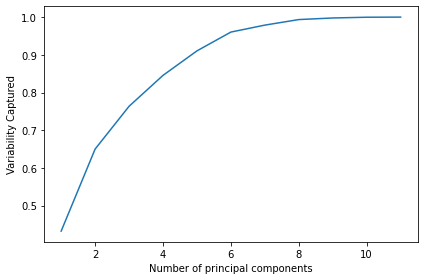

In [157]:
_ = plt.plot(range(1, df_479_clean.shape[1]+1),
            np.cumsum(pca_model_479.explained_variance_ratio_))
ax = plt.gca()
_ = ax.set_xlabel("Number of principal components")
_ = ax.set_ylabel("Variability Captured")

plt.tight_layout()

In [166]:
pca_model_767 = PCA()
pca_fit = pca_model_767.fit_transform(
          StandardScaler().fit_transform(df_767_clean))

In [168]:
np.round(np.cumsum(pca_model_767.explained_variance_ratio_)[5],3)

0.965

By taking the model from 9 to 5 variables we can still capture 96.5% of the variance.

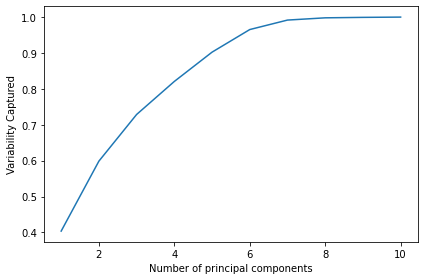

In [170]:
_ = plt.plot(range(1, df_767_clean.shape[1]+1),
            np.cumsum(pca_model_767.explained_variance_ratio_))
ax = plt.gca()
_ = ax.set_xlabel("Number of principal components")
_ = ax.set_ylabel("Variability Captured")

plt.tight_layout()

In [171]:
pca_model_q256 = PCA()
pca_fit = pca_model_q256.fit_transform(
          StandardScaler().fit_transform(df_q256_clean))

In [173]:
np.round(np.cumsum(pca_model_q256.explained_variance_ratio_)[6],3)

0.969

By taking the model from 12 to 6 we can stil explain 97% of the variance

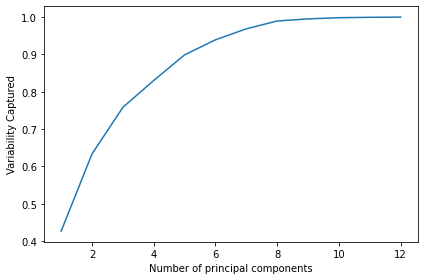

In [175]:
_ = plt.plot(range(1, df_q256_clean.shape[1]+1),
            np.cumsum(pca_model_q256.explained_variance_ratio_))
ax = plt.gca()
_ = ax.set_xlabel("Number of principal components")
_ = ax.set_ylabel("Variability Captured")

plt.tight_layout()

In [176]:
pca_model_q160 = PCA()
pca_fit = pca_model_q160.fit_transform(
          StandardScaler().fit_transform(df_q160_clean))

In [178]:
np.round(np.cumsum(pca_model_q160.explained_variance_ratio_)[6],3)

0.961

By taking the model from 12 to 6 we can stil explain 96% of the variance

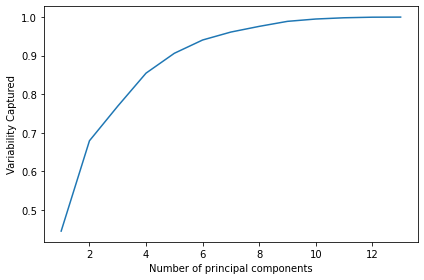

In [179]:
_ = plt.plot(range(1, df_q160_clean.shape[1]+1),
            np.cumsum(pca_model_q160.explained_variance_ratio_))
ax = plt.gca()
_ = ax.set_xlabel("Number of principal components")
_ = ax.set_ylabel("Variability Captured")

plt.tight_layout()